# Simple Neural Network Classification Diabetes prediction

In [21]:
# 1. Import Libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
# -----------------------------
# 2. Load Dataset
# -----------------------------
data = pd.read_csv("dataset/diabetes_dataset.csv")
data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [23]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [24]:
x = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [25]:

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
model = Sequential()

# Input + Hidden layer
model.add(Dense(16, activation='relu', input_shape=(x.shape[1],)))

# Hidden layer
model.add(Dense(8, activation='relu'))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [30]:
# 7. Train the model
# -----------------------------
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1)



Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8121 - loss: 0.4129 - val_accuracy: 0.7258 - val_loss: 0.4884
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8210 - loss: 0.4054 - val_accuracy: 0.7419 - val_loss: 0.4875
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7771 - loss: 0.4470 - val_accuracy: 0.7419 - val_loss: 0.4882
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7995 - loss: 0.4340 - val_accuracy: 0.7419 - val_loss: 0.4887
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8291 - loss: 0.3880 - val_accuracy: 0.7419 - val_loss: 0.4866
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7915 - loss: 0.4327 - val_accuracy: 0.7419 - val_loss: 0.4860
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7915 - loss: 0.4383 - val_accuracy: 0.7419 - val_loss: 0.4850
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8031 - loss: 0.4101 - val_accuracy: 0.7419 - val_loss:

In [31]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7316 - loss: 0.5934 
Test Accuracy: 0.7402597665786743


In [32]:
sample = X_test[0].reshape(1, -1)
pred = model.predict(sample)
print("Predicted Probability:", pred[0][0])
print("Predicted Class:", 1 if pred[0][0] > 0.5 else 0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
Predicted Probability: 0.27329326
Predicted Class: 0


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


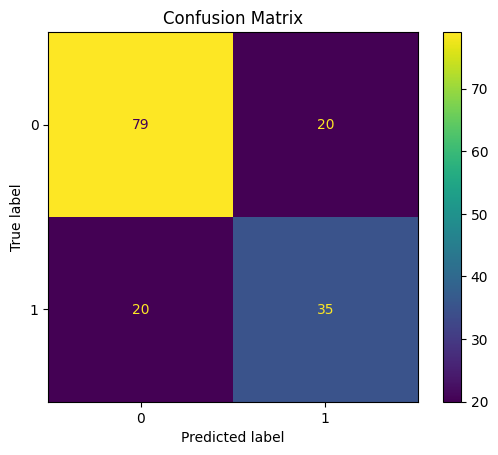

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# ---------------------------------
# 10. Generate Confusion Matrix
# ---------------------------------
y_pred = model.predict(X_test)
# Convert probabilities to class labels (0 or 1) using a threshold of 0.5
pred_classes = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test,pred_classes)

# ---------------------------------
# 11. Display Confusion Matrix
# ---------------------------------
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()